In [16]:
%run "./Ouverture_donnees.ipynb"

<ipython-input-16-6155fb3111bc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gravite'][i] = note
C:\Users\Pauline\AppData\Roaming\Python\Python38\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [29]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import datetime

## Outils statistiques et graphiques

#### Diagrammes en bar

In [18]:
def diag_barres_gravite(df, variable) :
    df_crosstab = pd.crosstab(df[variable], df.gravite).reset_index().melt(id_vars=[variable], value_vars=[1, 2], var_name = "gravite", value_name = "Nombre d'accidents")
    sns.barplot(x=variable, y="Nombre d'accidents", data=df_crosstab, hue = "gravite", dodge=True, palette = "pastel")

In [19]:
def diag_barres_gravite_cumulees(df, variable) :
    sns.set(rc = {'figure.figsize':(4, 4)})
    df_crosstab = pd.crosstab(df[variable], df.gravite, normalize = "index").reset_index().set_index(variable)
    df_crosstab.plot(kind = "bar", stacked=True, color = ["green", "red"])

In [20]:
#On copie-colle la fonction précédente à laquelle on ajoute une dimension "ax" par souci de mise en forme pour la suite (partie "Route")
def diag_barres_gravite_cumulees_axis1(df, variable) :
    sns.set(rc = {'figure.figsize':(4, 4)})
    df_crosstab = pd.crosstab(df[variable], df.gravite, normalize = "index").reset_index().set_index(variable)
    df_crosstab.plot(kind = "bar", stacked=True, color = ["green", "red"], ax=ax[1])

In [21]:
def diag_barres_interactif(df, variable) :
    sns.set(rc = {'figure.figsize':(15,8)})
    df_crosstab = pd.crosstab(df[variable], df.gravite, normalize = "index").reset_index().melt(id_vars=[variable], value_vars=[1, 2], var_name = "gravite", value_name = "Nombre d'accidents")
    df_crosstab["Nombre d'accidents"] = (df_crosstab["Nombre d'accidents"]*100).round(2)
    fig = px.bar(df_crosstab, x=variable, y="Nombre d'accidents", color="gravite", width = 400, height = 400)
    fig.show()

In [7]:
def diag_barres_interactif_usagers(df, variable) :
    df_crosstab = pd.crosstab(df[variable], df.grav, normalize = "index").reset_index().melt(id_vars=[variable], value_vars=["Blesse hospitalise", "Blesse leger", "Indemne", "Tue"], var_name = "gravite", value_name = "Nombre d'usagers")
    df_crosstab["Nombre d'usagers"] = (df_crosstab["Nombre d'usagers"]*100).round(2)
    fig = px.bar(df_crosstab, x=variable, y="Nombre d'usagers", color="gravite", width = 400, height = 400)
    fig.show()

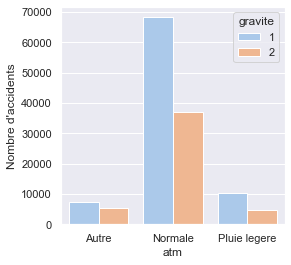

In [22]:
diag_barres_gravite(df, "atm")

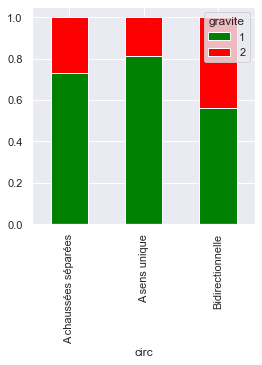

In [23]:
diag_barres_gravite_cumulees(df_accidents, "circ")

#### Camemberts

<AxesSubplot:ylabel='circ'>

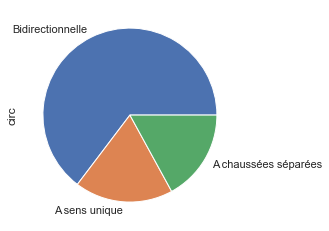

In [24]:
df.circ.value_counts().plot.pie()

<AxesSubplot:ylabel='prof'>

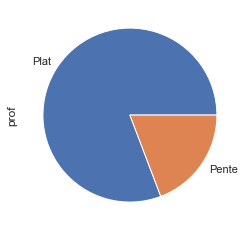

In [25]:
df.prof.value_counts().plot.pie()

## METEO

In [15]:
df_accidents["mois"] = df_accidents["mois"].astype(int)
df_accidents["jour"] = df_accidents["jour"].astype(int)

index = [i for i in range(df_accidents.shape[0])]
df_accidents.index = index

<ipython-input-15-f03832044dea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidents["mois"] = df_accidents["mois"].astype(int)
<ipython-input-15-f03832044dea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidents["jour"] = df_accidents["jour"].astype(int)


In [11]:
df_accidents = df_accidents.assign(date=0)
for i in range (df_accidents.shape[0]) :
    df_accidents["date"][i] = datetime.date(2019, df_accidents["mois"][i], df_accidents["jour"][i])

/Users/cloclo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df_accidents = df_accidents.assign(accident=1)
df_date = df_accidents.groupby('date').agg({"accident" : 'sum'}).reset_index()
df_date_grav1 = df_accidents[df_accidents.gravite==1].groupby('date').agg({"accident" : 'sum'}).reset_index()
df_date_grav2 = df_accidents[df_accidents.gravite==2].groupby('date').agg({"accident" : 'sum'}).reset_index()

#sns.lineplot(x='date', y = 'accident', data = df_date, color = 'blue')
#sns.lineplot(x='date', y = 'accident', data = df_date_grav1, color = 'green', dashes=True)
#sns.lineplot(x='date', y = 'accident', data = df_date_grav2, color = 'red')

Le grand pic correspond au 20 décembre.

In [29]:
df_accidents = df_accidents.assign(semaine=0)
for i in range (df_accidents.shape[0]) :
    df_accidents["semaine"][i] = (df_accidents["date"][i]).isocalendar()[1]
df_semaine = df_accidents.groupby('semaine').agg({"accident" : 'sum'}).reset_index()
#sns.lineplot(x='semaine', y = 'accident', data = df_semaine, color = 'blue')

/Users/cloclo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
#diag_barres_interactif(df_accidents, "atm")
#diag_barres_interactif(df_accidents, "surf")
#diag_barres_interactif(df_accidents, "lum")

In [31]:
#diag_barres_gravite_cumulees(df_accidents, "lum")

## USAGERS

En pourcentage, les conducteurs sortent plus indemnes des accidents que les passagers. \
Il y a une surreprésentation des blessés (légers et hospitalisés) et des tués chez les piétons. Cela semble logique puisqu'un piéton est plus vulnérable.

In [32]:
#diag_barres_interactif_usagers(df_usagers, "catu")

In [33]:
#diag_barres_interactif_usagers(df_usagers, "sexe")

In [34]:
#diag_barres_interactif_usagers(df, "categorie_age")

## STYLE DE CONDUITE

Nous allons étudier l'impact du style de conduite sur le nombre et la gravité des accidents. Le style de conduite est notammenté évalué à travers les variables:
1. motif du trajet (trajet professionnel, de loisirs, autre...)
2. catégorie du véhicule utilisé

Pour étudier la variable trajet, on s'intéresse au motif du trajet par véhicule impliqué dans l'accident. Nous décidons de prendre le motif uniquement du conducteur. On s'intéresse d'abord au pourcentage de véhicules dont le motif de déplacement n'a pas été renseigné (NaN).

###### 1. Motif du trajet

In [27]:
pourcentage_NaN = (df_usagers[df_usagers['catu'].isin(['Conducteur'])].trajet.isna().sum())/len(df_usagers[df_usagers['catu'].isin(['Conducteur'])])*100
print ("Le pourcentage de véhicules accidentés au motif de déplacement inconnu est de " + str(int(pourcentage_NaN)) +"%.")

Le pourcentage de véhicules accidentés au motif de déplacement inconnu est de 33%.


Parmi les 66% de véhicules accidentés restant, on s'intéresse au motif de déplacement des conducteurs.

Text(0.5, 1.0, 'Pourcentage des motifs de déplacement')

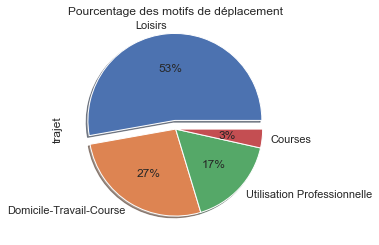

In [31]:
df_usagers[df_usagers['catu'].isin(['Conducteur'])].trajet.value_counts().plot.pie(autopct='%1.0f%%',explode=(0.1,0,0,0),shadow=True)
plt.title('Pourcentage des motifs de déplacement')

Parmi les accidents dont le motif de déplacement est renseigné, plus de la moitié (53%) a lieu lors d'un déplacement de loisirs.

###### 2. Catégorie de véhicule

Pour étudier cette variable, on utilise la base de données avec une ligne par véhicule (df_vehicules), à laquelle on ajoute la variable gravite

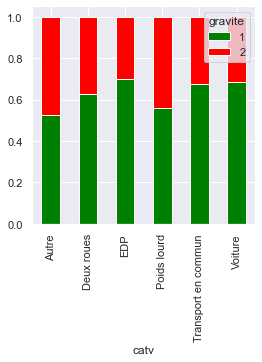

In [32]:
#Ajout de la variable gravite à la base de données véhicules
df_vehicules_gravite = df_vehicules.merge(df[['Num_Acc','gravite']],how='inner',on='Num_Acc')
df_vehicules_gravite.drop_duplicates(keep = 'first', inplace=True)
#Diagramme pondéré de la gravité de l'accident par rapport à la catégorie de véhicule
diag_barres_gravite_cumulees(df_vehicules_gravite,'catv')

In [33]:
#Calculs des pourcentages d'accidents de gravité de type 2 pour chaque catégorie de véhicule
print('Autre:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Autre'])].gravite.mean()-1)*100))+'%')
print('Deux roues:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Deux roues'])].gravite.mean()-1)*100))+'%')
print('EDP:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['EDP'])].gravite.mean()-1)*100))+'%')
print('Poids lourd:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Poids lourd'])].gravite.mean()-1)*100))+'%')
print('Transport en commun:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Transport en commun'])].gravite.mean()-1)*100))+'%')
print('Voiture:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Voiture'])].gravite.mean()-1)*100))+'%')

Autre:47%
Deux roues:37%
EDP:30%
Poids lourd:44%
Transport en commun:32%
Voiture:32%


On remarque que les poids lourds et les véhicules classés dans "Autre" (tracteurs agricoles, side-cars, quads...) sont particulièrement concernés par les accidents de gravité de type 2 (respectivement 44% et 47%). Pour les autres véhicules, les accidents de type 2 représentent environ 32% des accidents. Nous n'observons donc pas particulièrement de corrélation liée à la catégorie du véhicule.

## ROUTE

## ACCIDENTS